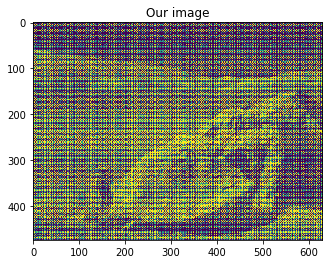

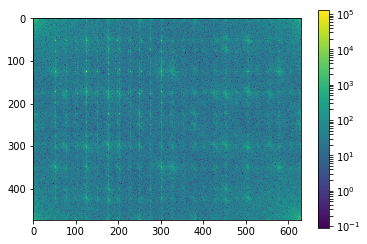

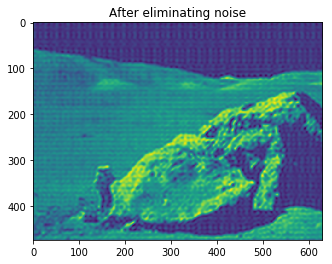

In [28]:
import numpy as np
from scipy import fftpack
import pylab
from matplotlib.colors import LogNorm

image = pylab.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")

plt.imshow(image)
plt.title('Our image')
plt.show()

fft = fftpack.fft2(image)
plt.imshow(np.abs(fft), norm=LogNorm()) # чтобы был виден спектр нужно нормализовать
plt.colorbar()
plt.show()

a = fft.shape[0]
b = fft.shape[1]
newfft = fft
newfft[a//10:(a*9)//10] = 0 #зануляем высокочастотные части
newfft[:, b//10:(b*9)//10] = 0

newimage = fftpack.ifft2(newfft).real.astype(float)
plt.imshow(newimage)
plt.title('After eliminating noise')
plt.show()

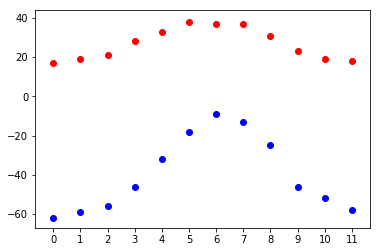

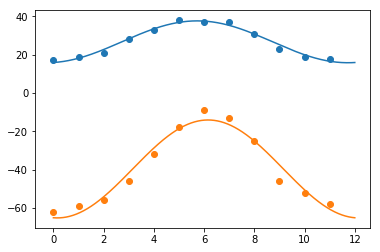

In [49]:
#Temperature 
import matplotlib.pyplot as plt
from scipy import optimize

tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
x = np.arange(12)
plt.scatter(x, tmin, c = 'b')
plt.scatter(x, tmax, c = 'r')
plt.xticks(np.arange(0, 12, 1))
plt.show()

#b - амплитуда 
#a - начальное состояние 
def f(t, a, b, shift) :
    return a + b * np.cos((t + shift) * np.pi / 6)
    
#используем curve_fit для поиска функции по данным f(x, parametres) + a

fmax = optimize.curve_fit(f, x, tmax, [-60, 30, 0])[0]
fmin = optimize.curve_fit(f, x, tmin, [-60, 30, 0])[0]

day = np.arange(0, 12, 1 / 365)
plt.scatter(x, tmax)
plt.plot(day, f(day, *fmax))
plt.scatter(x, tmin)
plt.plot(day, f(day, *fmin))
plt.show()

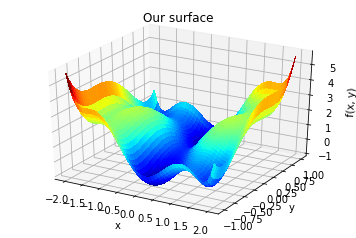

[-0.08984141  0.71265608 -1.          1.        ]


In [63]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def surface(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x1, y1 = np.meshgrid(x, y)

#plt.figure()  # simple visualization for use in tutorial
#plt.imshow(sixhump([xg, yg]))
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, y1, surface([x1, y1]), rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Our surface')
plt.show()

res = optimize.minimize(surface, [(-2,2),(-1,1)])
print(res.x)
#при локальном поиске ответ зависит от начальной точки и в точке (0,0) давать плоой результат

9.308620746322525


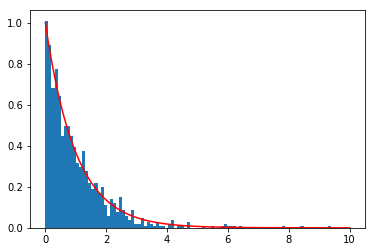

In [68]:
a = np.random.gamma(1, 1, 1000)
print(a.max())
bins = np.linspace(0,10,100)
plt.hist(a, bins=bins, density = True)
b = stats.gamma.pdf(bins,1)
plt.plot(bins, b, c = 'r')
plt.show()

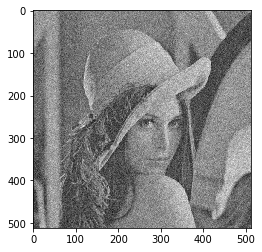

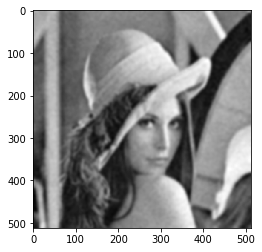

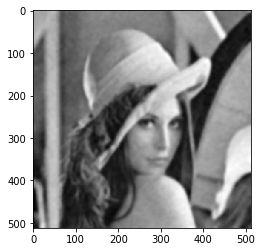

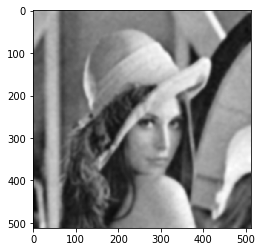

In [69]:
from scipy import ndimage
from scipy import misc
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
import numpy as np
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
from scipy import signal
wiener_lena = signal.wiener(blurred_lena, (5,5))
plt.imshow(noisy_lena, plt.cm.gray)
plt.show()
plt.imshow(blurred_lena, plt.cm.gray)
plt.show()
plt.imshow(median_lena, plt.cm.gray)
plt.show()
plt.imshow(wiener_lena, plt.cm.gray)
plt.show()

In [81]:
mas = np.zeros((7,7), dtype=np.int)
mas[1:6, 2:5] = 1
print(mas)
a = ndimage.binary_erosion(mas).astype(mas.dtype)
b = ndimage.binary_dilation(a).astype(a.dtype)
print('erosion, then dilation')
print(b)
c = ndimage.binary_opening(mas).astype(np.int)
print('opening')
print(c)

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
erosion, then dilation
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]
opening
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]


In [90]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
ans = (np.sum(mask) > np.sum(closed_mask))
print(ans)

True
